In [1]:
import os
import collections
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# data=pd.read_csv("/content/drive/My Drive/data/questions.csv",usecols=[3,5,6]) 
data=pd.read_csv("codechef_questions_v6.csv",usecols=[3,5,6]) 

if len(str(data['Problem Statement']).split(".",1))>1:
  data['Problem Statement']=data['Problem Statement'].str.split(".",1).str[1]

In [5]:
data['prob_sol'] = data['Problem Statement'] +' '+ data['Solution']
data.head()

,Problem Statement,Solution,tags,prob_sol
0,Read problems statements in Mandarin Chinese...,\n #include <cstring>\n #include <string...,['game'],Read problems statements in Mandarin Chinese...
1,Read problems statements in Mandarin Chinese...,\n #include <cstring>\n #include <string...,['game'],Read problems statements in Mandarin Chinese...
2,Read problems statements in Mandarin Chinese...,\n #include <iostream>\n #include <vecto...,['game'],Read problems statements in Mandarin Chinese...
3,Read problems statements in Mandarin Chinese...,\n #include <bits/stdc++.h> \n using na...,['game'],Read problems statements in Mandarin Chinese...
4,Read problems statements in Mandarin Chinese...,\n /***************************************...,['game'],Read problems statements in Mandarin Chinese...


In [6]:
# data.head()
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords

# stop = stopwords.words('english')
# data['prob_sol'].apply(lambda x: [item for item in x if item not in stop])
# print("done")

In [7]:
def clean_statement(statement):
#     x = re.sub('-', ' ', x)
    statement = re.sub('$', ' ', statement)
    statement = re.sub('[^A-Za-z]+', ' ', statement)
    statement = re.sub('[,|.|?|\n]|\t', '', statement)
    statement = re.sub('n\'t', ' ', statement)
    statement = re.sub('submission|submissions|Submission|submission|th ', '', statement)
    statement = re.sub('one|two|given|need', '', statement)
    
    return statement

In [8]:
def clean_tags(tags):
    
    tags = clean_statement(tags).strip()
    tags = list(re.split(' ',tags))
    return tags

In [9]:
def get_unique_tags(tags):
    
    tags_list = []
    
    tags_set = set(tags_list)
    
    for row in tags:
        tags_set = tags_set.union(set(row))
        
    tags_list = list(tags_set)
    
    return tags_list

In [10]:
# import copy

# X = copy.deepcopy(data["prob_sol"])
X = data["prob_sol"]
Y = [clean_tags(x) for x in data["tags"]]
distinct_tags = get_unique_tags(Y)

print(distinct_tags)

mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(Y)

['binarysearch', 'parsing', 'multiset', 'expo', 'tries', 'bfs', 'trees', 'deque', 'dfs', 'matrix', 'gcd', 'combinatorics', 'memoization', 'permutation', 'enumeration', 'kruskal', 'game', 'constructive', 'number', 'probability', 'segment', 'geometry', 'binary', 'sorting', 'graphs', 'recurrence', 'heap', 'backtracking', 'bruteforce', 'basic', 'counting', 'implementation', 'bitmasking', 'knapsack', 'algebra', 'digraph', 'dijkstra', 'fibonacci', 'recursion', 'prime', 'greedy', 'bitwise', 'set', 'hard', 'hashing', 'fft', 'array', 'theory', 'pattern', 'tree', 'inversions', 'series', 'sets', 'sieve', 'euler', 'maths', 'bipartite', 'adhoc', 'disjoint', 'graph', 'strings', 'fenwick', 'matching', 'dynamic', 'maxflow', 'combinatorial', 'interactive', 'suffix', 'dp', 'search', 'pointers', 'divide', 'map', 'algorithm', 'stack', 'regex', 'advanced', 'simulation']


In [11]:
def plot_tags( Y,tags ):
    n = Y.shape[1]
    m = Y.shape[0]
    counts = [0]*n
    for i in range(n):
        counts[i] = np.sum( Y[:,i]/m )
        
    plt.figure( figsize=(10,15))
    plt.barh(tags,counts,color='green')
    plt.show()

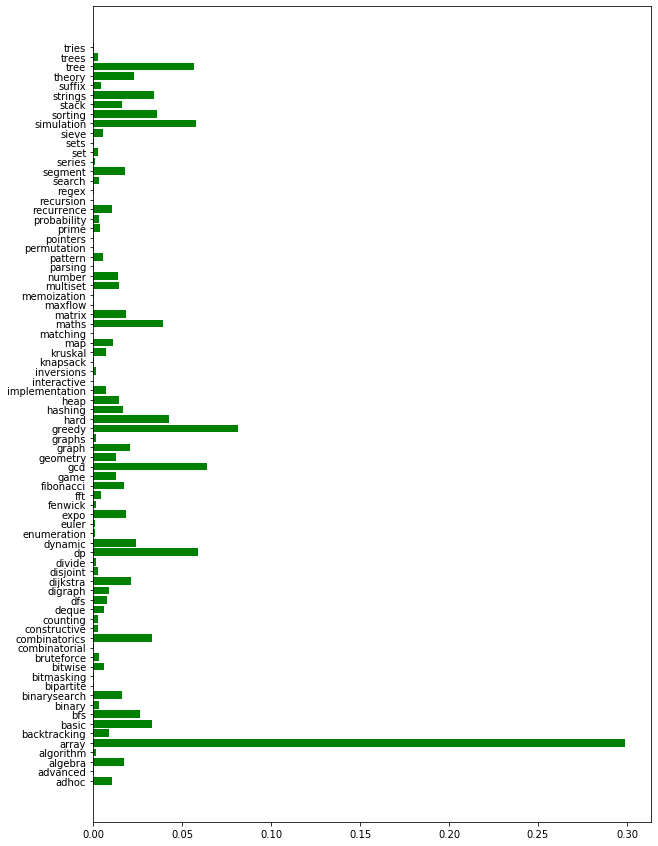

In [12]:
plot_tags(Y,mlb.classes_)